# TIMP4 MR

In [1]:
library(readr)
library(dplyr, warn.conflicts = FALSE)
library(tidyr, warn.conflicts = FALSE)
library(purrr)
library(ggplot2)

Gene region of TIMP4 in hg19:

In [2]:
gencode <- rtracklayer::readGFF("~/projects/DVA/Data/ReferenceData/gencode.v19.annotation.gtf")
head(gencode)

,seqid,source,type,start,end,score,strand,phase,gene_id,transcript_id,⋯,transcript_name,level,havana_gene,tag,havana_transcript,exon_number,exon_id,ont,protein_id,ccdsid
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,chr1,HAVANA,gene,11869,14412,NA,+,NA,ENSG00000223972.4,ENSG00000223972.4,⋯,DDX11L1,2,OTTHUMG00000000961.2,NA,NA,NA,NA,NA,NA,NA
2,chr1,HAVANA,transcript,11869,14409,NA,+,NA,ENSG00000223972.4,ENST00000456328.2,⋯,DDX11L1-002,2,OTTHUMG00000000961.2,basic,OTTHUMT00000362751.1,NA,NA,NA,NA,NA
3,chr1,HAVANA,exon,11869,12227,NA,+,NA,ENSG00000223972.4,ENST00000456328.2,⋯,DDX11L1-002,2,OTTHUMG00000000961.2,basic,OTTHUMT00000362751.1,1,ENSE00002234944.1,NA,NA,NA
4,chr1,HAVANA,exon,12613,12721,NA,+,NA,ENSG00000223972.4,ENST00000456328.2,⋯,DDX11L1-002,2,OTTHUMG00000000961.2,basic,OTTHUMT00000362751.1,2,ENSE00003582793.1,NA,NA,NA
5,chr1,HAVANA,exon,13221,14409,NA,+,NA,ENSG00000223972.4,ENST00000456328.2,⋯,DDX11L1-002,2,OTTHUMG00000000961.2,basic,OTTHUMT00000362751.1,3,ENSE00002312635.1,NA,NA,NA
6,chr1,ENSEMBL,transcript,11872,14412,NA,+,NA,ENSG00000223972.4,ENST00000515242.2,⋯,DDX11L1-201,3,OTTHUMG00000000961.2,NA,NA,NA,NA,NA,NA,NA


In [3]:
gene_regions <- gencode %>%
    filter(type == "gene") %>%
    transmute(chr = as.numeric(gsub("chr", "", seqid)), gene_name, start, end, strand, gene_type) %>%
    drop_na
head(gene_regions)

Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"


,chr,gene_name,start,end,strand,gene_type
,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
1,1,DDX11L1,11869,14412,+,pseudogene
2,1,WASH7P,14363,29806,-,pseudogene
3,1,MIR1302-11,29554,31109,+,lincRNA
4,1,FAM138A,34554,36081,-,lincRNA
5,1,OR4G4P,52473,54936,+,pseudogene
6,1,OR4G11P,62948,63887,+,pseudogene


In [4]:
timp4_region <- gene_regions %>%
    filter(gene_name == "TIMP4")
timp4_region

chr,gene_name,start,end,strand,gene_type
<dbl>,<chr>,<int>,<int>,<chr>,<chr>
3,TIMP4,12194551,12200851,-,protein_coding


In [3]:
12194551 - 5e5
12200851 + 5e5

[1] 11694551

[1] 12700851

In [5]:
minpos <- timp4_region$start - 5e5
maxpos <- timp4_region$end + 5e5

TIMP4 summary statistics were manually downloaded from the Open GWAS database in VCF format. To import the required gene region:

In [6]:
timp4_ins <- paste(
    "zcat /ludc/Home/daniel_c/projects/DVA/Data/GWAS_sumstats/prot-a-2980.vcf.gz",
    "grep -v '#'",
    "awk '$1 == 3'",
    paste0("awk '$2 > ", minpos, " && $2 < ", maxpos, "'"),
    "cut -f1,2,4,5,10",
    "sed 's/:/\t/g'",
    sep = " | "
) %>%
    pipe %>%
    read_tsv(col_names = c("chr", "position", 
                           paste(c("nea", "ea", "beta", "se", "logp", "eaf"), "exp", sep = "_"),
                           "rsid"),
             col_types = "nnccnnnnc")
head(timp4_ins)
nrow(timp4_ins)

Warning message:
"One or more parsing issues, see `problems()` for details"


chr,position,nea_exp,ea_exp,beta_exp,se_exp,logp_exp,eaf_exp,rsid
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,7194660,G,A,-0.0624,0.0259,1.8000000,0.32366,rs12485585
3,7194910,A,C,-0.0334,0.0243,0.7700010,0.52204,rs7626768
3,7194934,C,T,-0.0633,0.0259,1.8400000,0.32471,rs12492322
3,7195141,T,C,-0.0624,0.0259,1.8000000,0.32340,rs17234990
3,7195159,C,T,0.0361,0.0314,0.5999990,0.18590,rs7617753
3,7195492,A,G,-0.0090,0.1328,0.0199998,0.00975,rs79541426


[1] 41021

## BMI data

In [7]:
bmi <- paste0(
    "awk '$1 == 3 && $2 > ", minpos, " && $2 < ", maxpos, "' ",
    "~/projects/DVA/Data/GWAS_sumstats/bmi.txt"
) %>%
    pipe %>%
    read_tsv(col_names = c("chr", "position", "rsid", 
                           paste(c("ea", "nea", "eaf", "beta", "se", "pval", "n"), "bmi", sep = "_")),
             col_types = "nncccnnnnn")
head(bmi)
nrow(bmi)

chr,position,rsid,ea_bmi,nea_bmi,eaf_bmi,beta_bmi,se_bmi,pval_bmi,n_bmi
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,13432141,rs1000054,A,G,0.34210,-0.0082,0.0018,7.5e-06,691797
3,7934333,rs1001254,C,G,0.85090,-0.0011,0.0025,6.6e-01,691568
3,9112746,rs1001603,A,G,0.44070,0.0005,0.0018,7.9e-01,671732
3,10538529,rs1003274,T,C,0.81980,0.0003,0.0023,9.1e-01,669689
3,10866255,rs10049332,A,T,0.94341,0.0039,0.0036,2.8e-01,675999
3,8896462,rs1005988,A,C,0.58950,-0.0023,0.0018,2.0e-01,678402


[1] 9805

## Outcome data

In [8]:
t2d <- paste(
    "grep '^3' ~/projects/DVA/Data/GWAS_sumstats/t2d_diagram.txt",
    "sed 's/:/\t/g'",
    paste0("awk '$2 > ", minpos, " && $2 < ", maxpos, "'"),
    sep = " | "
) %>%
    pipe %>%
    read_tsv(col_names = c("chr", "position", 
                           paste(c("ea", "nea", "beta", "se", "pval", "n"), "t2d", sep = "_")),
             col_types = "nnccnnnn")
head(t2d)
nrow(t2d)

chr,position,ea_t2d,nea_t2d,beta_t2d,se_t2d,pval_t2d,n_t2d
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
3,12904558,A,G,-0.0410,0.018,0.026,158185
3,10704569,T,C,-0.0240,0.023,0.310,158185
3,14486746,T,C,-0.0630,0.084,0.450,140826
3,14385910,A,G,-0.1300,0.087,0.140,115805
3,7913209,T,C,-0.0059,0.013,0.660,158185
3,12514665,T,C,0.0880,0.100,0.400,148040


[1] 48208

## Reference panel data

In [9]:
freq_1kg <- paste0(
    "awk '$1 == 3 && $2 > ", minpos, " && $2 < ", maxpos, "' ",
    "/ludc/Home/daniel_c/projects/DVA/Data/ReferenceData/1kg.afreq"
) %>%
    pipe %>%
    read_tsv(col_names = c("chr", "position", "rsid", "nea_1kg_plus", "ea_1kg_plus", "eaf_1kg"),
             col_types = "nncccn")
head(freq_1kg)
nrow(freq_1kg)

chr,position,rsid,nea_1kg_plus,ea_1kg_plus,eaf_1kg
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
3,7194660,rs12485585,G,A,0.3310140
3,7194910,rs7626768,A,C,0.5596420
3,7194934,rs12492322,C,T,0.3320080
3,7195141,rs17234990,T,C,0.3300200
3,7195159,rs7617753,C,T,0.2137180
3,7195634,rs114154698,G,A,0.0129225


[1] 34069

In [10]:
join_dat <- list(timp4_ins, bmi, t2d, freq_1kg) %>%
    reduce(inner_join)
head(join_dat)
nrow(join_dat)

Joining, by = c("chr", "position", "rsid")
Joining, by = c("chr", "position")
Joining, by = c("chr", "position", "rsid")


chr,position,nea_exp,ea_exp,beta_exp,se_exp,logp_exp,eaf_exp,rsid,ea_bmi,⋯,n_bmi,ea_t2d,nea_t2d,beta_t2d,se_t2d,pval_t2d,n_t2d,nea_1kg_plus,ea_1kg_plus,eaf_1kg
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
3,7194910,A,C,-0.0334,0.0243,0.770001,0.52204,rs7626768,A,⋯,687973,A,C,0.0120,0.012,0.31,158185,A,C,0.559642
3,7195141,T,C,-0.0624,0.0259,1.800000,0.32340,rs17234990,T,⋯,792456,T,C,0.0064,0.013,0.62,158185,T,C,0.330020
3,7195159,C,T,0.0361,0.0314,0.599999,0.18590,rs7617753,T,⋯,688919,T,C,-0.0120,0.015,0.43,158185,C,T,0.213718
3,7195734,G,A,0.0279,0.0316,0.420000,0.18350,rs1553149,A,⋯,688836,A,G,-0.0120,0.015,0.43,158185,G,A,0.212724
3,7196728,C,T,0.0272,0.0317,0.410000,0.18205,rs7621420,T,⋯,688805,T,C,-0.0160,0.016,0.32,152598,C,T,0.210736
3,7197642,C,T,-0.0335,0.0244,0.770001,0.51987,rs7624462,T,⋯,685945,T,C,-0.0140,0.013,0.25,152598,C,T,0.554672


[1] 9728

## Alignment to allele increasing BMI

In [11]:
aligned_dat <- join_dat %>%
    mutate(maf_exp = ifelse(eaf_exp < .5, eaf_exp, 1 - eaf_exp),
           maf_bmi = ifelse(eaf_bmi < .5, eaf_bmi, 1 - eaf_bmi),
           maf_1kg = ifelse(eaf_1kg < .5, eaf_1kg, 1 - eaf_1kg),
           dif1 = abs(maf_exp - maf_bmi),
           dif2 = abs(maf_exp - maf_1kg),
           dif3 = abs(maf_1kg - maf_bmi)) %>%
    filter(dif1 < .2 | dif2 < .2 | dif3 < .2) %>%
    select(-c(dif1, dif2, dif3, eaf_exp, eaf_bmi, eaf_1kg)) %>%
    mutate(ea = ifelse(beta_bmi > 0, ea_bmi, nea_bmi),
           nea = ifelse(beta_bmi > 0, nea_bmi, ea_bmi),
           beta_bmi = abs(beta_bmi),
           palind1 = ea %in% c("A", "T") & nea %in% c("A", "T"),
           palind2 = ea %in% c("C", "G") & nea %in% c("C", "G"),
           palind_ambig = (palind1 | palind2) & maf_1kg > .3) %>%
    filter(!palind_ambig) %>%
    select(-c(ea_bmi, nea_bmi, palind1, palind2, palind_ambig)) %>%
    mutate(harmon_1kg = case_when(ea == ea_1kg_plus & nea == nea_1kg_plus ~ 1,
                                  ea == nea_1kg_plus & nea == ea_1kg_plus ~ -1,
                                  TRUE ~ 0),
           harmon_exp = case_when(ea == ea_exp & nea == nea_exp ~ 1,
                                  ea == nea_exp & nea == ea_exp ~ -1,
                                  TRUE ~ 0),
           harmon_t2d = case_when(ea == ea_t2d & nea == nea_t2d ~ 1,
                                  ea == nea_t2d & nea == ea_t2d ~ -1,
                                  TRUE ~ 0)) %>%
    {
        if(any(.$harmon_1kg == 0) | any(.$harmon_exp == 0) | any(.$harmon_t2d == 0)){
            stop("Found alleles not matching!")
        } else { . }
    } %>%
    mutate(beta_exp = beta_exp * harmon_exp,
           beta_t2d = beta_t2d * harmon_t2d,
           pval_exp = 10^-(logp_exp)) %>%
    select(chr, position, rsid, ea, nea, starts_with("beta_"), starts_with("se_"), starts_with("pval_"))
head(aligned_dat)
nrow(aligned_dat)

chr,position,rsid,ea,nea,beta_exp,beta_bmi,beta_t2d,se_exp,se_bmi,se_t2d,pval_bmi,pval_t2d,pval_exp
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,7194910,rs7626768,C,A,-0.0334,0.0032,-0.0120,0.0243,0.0017,0.012,0.059,0.31,0.16982397
3,7195141,rs17234990,C,T,-0.0624,0.0041,-0.0064,0.0259,0.0017,0.013,0.020,0.62,0.01584893
3,7195159,rs7617753,C,T,-0.0361,0.0016,0.0120,0.0314,0.0022,0.015,0.480,0.43,0.25118922
3,7195734,rs1553149,G,A,-0.0279,0.0016,0.0120,0.0316,0.0022,0.015,0.480,0.43,0.38018940
3,7196728,rs7621420,C,T,-0.0272,0.0017,0.0160,0.0317,0.0022,0.016,0.450,0.32,0.38904514
3,7197642,rs7624462,T,C,-0.0335,0.0035,-0.0140,0.0244,0.0017,0.013,0.041,0.25,0.16982397


[1] 9204

In [12]:
lead_snp <- aligned_dat %>%
    filter(pval_bmi < 5e-8) %>%
    slice_min(pval_exp)
head(lead_snp)

chr,position,rsid,ea,nea,beta_exp,beta_bmi,beta_t2d,se_exp,se_bmi,se_t2d,pval_bmi,pval_t2d,pval_exp
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,12391207,rs6802898,T,C,-0.3019,0.0168,-0.12,0.0385,0.0024,0.018,6.4e-12,2.1e-11,4.786301e-15


In [13]:
snp_region <- aligned_dat %>%
    filter(position > lead_snp$position - 5e5,
           position < lead_snp$position + 5e5)
head(snp_region)
nrow(snp_region)

chr,position,rsid,ea,nea,beta_exp,beta_bmi,beta_t2d,se_exp,se_bmi,se_t2d,pval_bmi,pval_t2d,pval_exp
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,11891529,rs9819059,C,T,-0.0234,0.0027,-0.0059,0.0250,0.0018,0.013,0.12,0.640,0.3467369
3,11893950,rs732096,T,C,-0.0217,0.0009,-0.0063,0.0264,0.0018,0.013,0.64,0.630,0.4168694
3,11895450,rs1605404,A,G,-0.0217,0.0021,-0.0098,0.0257,0.0018,0.013,0.24,0.450,0.3981072
3,11895829,rs303851,G,A,-0.0031,0.0013,-0.0230,0.0257,0.0018,0.013,0.46,0.076,0.9120110
3,11896347,rs303850,G,A,-0.0034,0.0012,-0.0240,0.0257,0.0018,0.012,0.49,0.057,0.8912509
3,11898859,rs2133064,G,A,-0.0544,0.0036,-0.0390,0.0775,0.0051,0.035,0.48,0.270,0.4786301


[1] 844

In [14]:
source("./MR_FX.R")

In [15]:
ldmat_fx <- function (variants, bfile, plink_bin, with_alleles = TRUE) 
{
    shell <- ifelse(Sys.info()["sysname"] == "Windows", "cmd", 
        "sh")
    fn <- tempfile()
    write.table(data.frame(variants), file = fn, row.names = F, 
        col.names = F, quote = F)
    fun1 <- paste0(shQuote(plink_bin, type = shell), " --bfile ", 
        shQuote(bfile, type = shell), " --extract ", shQuote(fn, 
            type = shell), " --make-just-bim ", " --keep-allele-order ", 
        " --out ", shQuote(fn, type = shell))
    system(fun1)
    bim <- read.table(paste0(fn, ".bim"), stringsAsFactors = FALSE)
    fun2 <- paste0(shQuote(plink_bin, type = shell), " --bfile ", 
        shQuote(bfile, type = shell), " --extract ", shQuote(fn, 
            type = shell), " --r square ", " --keep-allele-order ", 
        " --out ", shQuote(fn, type = shell))
    system(fun2)
    res <- read.table(paste0(fn, ".ld"), header = FALSE) %>% 
        as.matrix
    if (with_alleles) {
        rownames(res) <- colnames(res) <- paste(bim$V2, bim$V5, 
            bim$V6, sep = "_")
    }
    else {
        rownames(res) <- colnames(res) <- bim$V2
    }
    return(res)
}

In [16]:
plink <- "/ludc/Tools/Software/Plink/v1.90p/plink"
b.file <- "/ludc/Home/daniel_c/projects/DVA/Data/ReferenceData/1kg_ref/EUR"
ldmat <- ldmat_fx(snp_region$rsid, bfile = b.file, plink_bin = plink)

In [17]:
dim(ldmat)

[1] 844 844

In [18]:
ldmat_snps <- tibble(rsid = rownames(ldmat)) %>%
    separate(rsid, c("rsid", "a2", "a1"), sep = "_") %>%
    tibble::rowid_to_column()
head(ldmat_snps)
nrow(ldmat_snps)

rowid,rsid,a2,a1
<int>,<chr>,<chr>,<chr>
1,rs9819059,T,C
2,rs732096,C,T
3,rs1605404,G,A
4,rs303851,G,A
5,rs303850,G,A
6,rs2133064,A,G


[1] 844

In [19]:
heidi_ins <- inner_join(snp_region, ldmat_snps, by = c("rsid")) %>%
    mutate(harmon = case_when(ea == a1 & nea == a2 ~ 1,
                              ea == a2 & nea == a1 ~ -1,
                              TRUE ~ 0)) %>% 
    filter(harmon != 0) %>%
    mutate(top = rsid == lead_snp$rsid,
           harmon = ifelse(harmon[top] == 1, harmon, -harmon),
           r2 = ldmat[rowid[top], rowid]^2)
head(heidi_ins)
nrow(heidi_ins)

chr,position,rsid,ea,nea,beta_exp,beta_bmi,beta_t2d,se_exp,se_bmi,se_t2d,pval_bmi,pval_t2d,pval_exp,rowid,a2,a1,harmon,top,r2
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<lgl>,<dbl>
3,11891529,rs9819059,C,T,-0.0234,0.0027,-0.0059,0.0250,0.0018,0.013,0.12,0.640,0.3467369,1,T,C,-1,FALSE,0.0047343069
3,11893950,rs732096,T,C,-0.0217,0.0009,-0.0063,0.0264,0.0018,0.013,0.64,0.630,0.4168694,2,C,T,-1,FALSE,0.0049309186
3,11895450,rs1605404,A,G,-0.0217,0.0021,-0.0098,0.0257,0.0018,0.013,0.24,0.450,0.3981072,3,G,A,-1,FALSE,0.0126193769
3,11895829,rs303851,G,A,-0.0031,0.0013,-0.0230,0.0257,0.0018,0.013,0.46,0.076,0.9120110,4,G,A,-1,FALSE,0.0013931034
3,11896347,rs303850,G,A,-0.0034,0.0012,-0.0240,0.0257,0.0018,0.012,0.49,0.057,0.8912509,5,G,A,-1,FALSE,0.0013931034
3,11898859,rs2133064,G,A,-0.0544,0.0036,-0.0390,0.0775,0.0051,0.035,0.48,0.270,0.4786301,6,A,G,-1,FALSE,0.0008835994


[1] 844

In [20]:
top_20 <- heidi_ins %>%
    filter(top | (r2 > 0.05 & r2 < 0.9),
           pval_exp < pchisq(10, df = 1, lower.tail = FALSE)) %>%
    arrange(desc(top), desc(r2), pval_exp) %>% 
    slice(1:20)
head(top_20)
nrow(top_20)

chr,position,rsid,ea,nea,beta_exp,beta_bmi,beta_t2d,se_exp,se_bmi,se_t2d,pval_bmi,pval_t2d,pval_exp,rowid,a2,a1,harmon,top,r2
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<lgl>,<dbl>
3,12391207,rs6802898,T,C,-0.3019,0.0168,-0.120,0.0385,0.0024,0.018,6.4e-12,2.1e-11,4.786301e-15,502,T,C,-1,TRUE,1.0000000
3,12413339,rs2120825,G,T,-0.3056,0.0147,-0.100,0.0407,0.0026,0.019,2.8e-08,2.4e-07,6.165950e-14,519,G,T,-1,FALSE,0.6485967
3,12359049,rs2067819,A,G,-0.1172,0.0036,-0.068,0.0303,0.0020,0.015,7.0e-02,3.5e-06,1.122018e-04,475,A,G,-1,FALSE,0.4252683
3,12340267,rs9817428,A,C,-0.1116,0.0052,-0.054,0.0288,0.0019,0.014,5.5e-03,2.0e-04,1.071519e-04,445,A,C,-1,FALSE,0.3812482
3,12346849,rs10510411,A,G,-0.1110,0.0035,-0.052,0.0287,0.0020,0.014,8.2e-02,2.0e-04,1.096478e-04,457,A,G,-1,FALSE,0.3795952
3,12346738,rs10510410,C,A,-0.1099,0.0035,-0.053,0.0287,0.0020,0.014,8.0e-02,1.6e-04,1.288250e-04,456,C,A,-1,FALSE,0.3795952


[1] 20

In [21]:
ldmat2 <- ldmat[top_20$rowid, top_20$rowid]
for(i in 1:nrow(ldmat2)){
    for(j in 1:nrow(ldmat2)){
        ldmat2[i,j] <- ifelse(identical(top_20$harmon[i], top_20$harmon[j]),
                              ldmat2[i,j], -ldmat2[i,j])
    }
}

In [22]:
select(top_20, rsid, beta_exp, se_exp, beta_t2d, se_t2d, pval_exp, pval_t2d, top, r2)

rsid,beta_exp,se_exp,beta_t2d,se_t2d,pval_exp,pval_t2d,top,r2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
rs6802898,-0.3019,0.0385,-0.120,0.018,4.786301e-15,2.1e-11,TRUE,1.0000000
rs2120825,-0.3056,0.0407,-0.100,0.019,6.165950e-14,2.4e-07,FALSE,0.6485967
rs2067819,-0.1172,0.0303,-0.068,0.015,1.122018e-04,3.5e-06,FALSE,0.4252683
rs9817428,-0.1116,0.0288,-0.054,0.014,1.071519e-04,2.0e-04,FALSE,0.3812482
rs10510411,-0.1110,0.0287,-0.052,0.014,1.096478e-04,2.0e-04,FALSE,0.3795952
rs10510410,-0.1099,0.0287,-0.053,0.014,1.288250e-04,1.6e-04,FALSE,0.3795952
rs12631028,-0.1137,0.0288,-0.057,0.014,7.943282e-05,4.9e-05,FALSE,0.3785153
rs13076055,-0.1106,0.0288,-0.054,0.014,1.230269e-04,1.1e-04,FALSE,0.3785153
rs12636461,-0.1103,0.0288,-0.054,0.014,1.258925e-04,1.0e-04,FALSE,0.3785153


In [23]:
top_20 %>%
    filter(top) %>%
    transmute(beta_smr = beta_t2d/beta_exp,
              se_smr = std_err_smr(beta_exp, se_exp, beta_t2d, se_t2d),
              p_smr = pval_smr(beta_exp, se_exp, beta_t2d, se_t2d))

beta_smr,se_smr,p_smr
<dbl>,<dbl>,<dbl>
0.3974826,0.07825745,3.790944e-07


In [24]:
heidi_pvalue(top_20$beta_exp, top_20$se_exp, top_20$beta_t2d, top_20$se_t2d, ldmat2, 1)

[1] 0.4200835

In [25]:
heidi_ins %>%
    head

chr,position,rsid,ea,nea,beta_exp,beta_bmi,beta_t2d,se_exp,se_bmi,se_t2d,pval_bmi,pval_t2d,pval_exp,rowid,a2,a1,harmon,top,r2
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<lgl>,<dbl>
3,11891529,rs9819059,C,T,-0.0234,0.0027,-0.0059,0.0250,0.0018,0.013,0.12,0.640,0.3467369,1,T,C,-1,FALSE,0.0047343069
3,11893950,rs732096,T,C,-0.0217,0.0009,-0.0063,0.0264,0.0018,0.013,0.64,0.630,0.4168694,2,C,T,-1,FALSE,0.0049309186
3,11895450,rs1605404,A,G,-0.0217,0.0021,-0.0098,0.0257,0.0018,0.013,0.24,0.450,0.3981072,3,G,A,-1,FALSE,0.0126193769
3,11895829,rs303851,G,A,-0.0031,0.0013,-0.0230,0.0257,0.0018,0.013,0.46,0.076,0.9120110,4,G,A,-1,FALSE,0.0013931034
3,11896347,rs303850,G,A,-0.0034,0.0012,-0.0240,0.0257,0.0018,0.012,0.49,0.057,0.8912509,5,G,A,-1,FALSE,0.0013931034
3,11898859,rs2133064,G,A,-0.0544,0.0036,-0.0390,0.0775,0.0051,0.035,0.48,0.270,0.4786301,6,A,G,-1,FALSE,0.0008835994


In [26]:
lead_snp

chr,position,rsid,ea,nea,beta_exp,beta_bmi,beta_t2d,se_exp,se_bmi,se_t2d,pval_bmi,pval_t2d,pval_exp
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,12391207,rs6802898,T,C,-0.3019,0.0168,-0.12,0.0385,0.0024,0.018,6.4e-12,2.1e-11,4.786301e-15


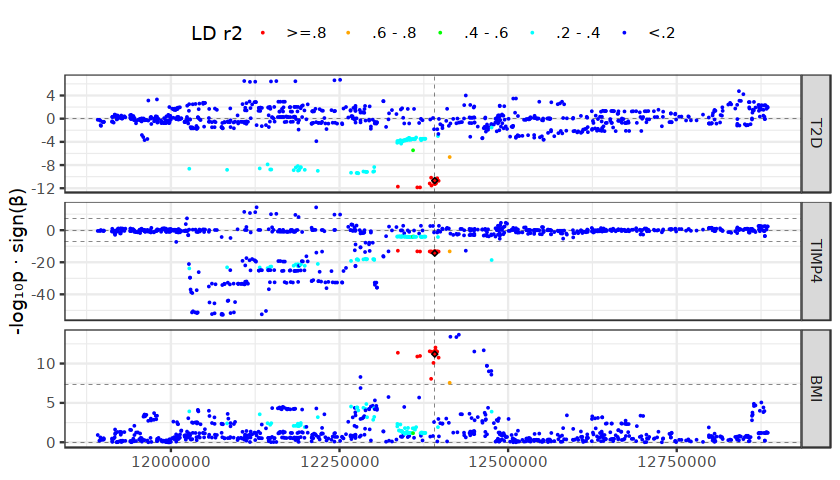

In [61]:
options(repr.plot.width = 7, repr.plot.height = 4)
locus_timp4_dat <- heidi_ins %>%
    transmute(position, top,
              ldcol = case_when(r2 >= 0.8 ~ ">=.8",
                                r2 < 0.8 & r2 >= 0.6 ~ ".6 - .8",
                                r2 < 0.6 & r2 >= 0.4 ~ ".4 - .6",
                                r2 < 0.4 & r2 >= 0.2 ~ ".2 - .4",
                                r2 < 0.2 ~ "<.2"),
              ldcol = factor(ldcol, levels = c(">=.8", ".6 - .8", ".4 - .6", ".2 - .4", "<.2")),
              across(starts_with("pval_"), ~-log10(.x)),
              pval_bmi = pval_bmi * sign(beta_bmi),
              pval_t2d = pval_t2d * sign(beta_t2d),
              pval_exp = pval_exp * sign(beta_exp)) %>%
    pivot_longer(-c(position, top, ldcol)) %>%
    mutate(name = gsub("pval_", "", name),
           name = recode_factor(name, t2d = "T2D", exp = "TIMP4", bmi = "BMI"),
           thresh_upper = ifelse(name == "T2D", NA, -log10(5e-8)),
           thresh_lower = ifelse(name == "TIMP4", log10(5e-8), NA))
locus_timp4_plot <- locus_timp4_dat %>%
    ggplot(aes(position, value)) +
    geom_vline(xintercept = lead_snp$position, linetype = "dashed", size = .1) +
    geom_hline(yintercept = 0, na.rm = TRUE, linetype = "dashed", size = .1) +
    geom_hline(aes(yintercept = thresh_upper), na.rm = TRUE, linetype = "dashed", size = .1) +
    geom_hline(aes(yintercept = thresh_lower), na.rm = TRUE, linetype = "dashed", size = .1) +
    geom_point(aes(color = ldcol), size = .01) +
    geom_point(data = locus_timp4_dat %>% filter(top), 
               shape = 23, size = 1, fill = "red", color = "black") +
    scale_color_manual(values = c("red", "orange", "green", "cyan", "blue"), name = "LD r2") +
    facet_wrap(~name, ncol = 1, scales = "free_y", strip.position = "right") +
    theme_bw() +
    theme(legend.position = "top") +
    labs(x = NULL, y = "-log\u2081\u2080p \u00b7 sign(\u03b2)")
locus_timp4_plot

In [28]:
lims_locus <- ggplot_build(locus_timp4_plot)$layout$panel_scales_x[[1]]$range$range
lims_locus

[1] 11891529 12884957

In [29]:
options(repr.plot.width = 7, repr.plot.height = 4)
gene_track_dat <- gene_regions %>%
    filter(chr == 3, end > lims_locus[1], start < lims_locus[2]) %>%
    mutate(start = ifelse(start < lims_locus[1], lims_locus[1], start),
           end = ifelse(end > lims_locus[2], lims_locus[2], end),
           xstart = ifelse(strand == "+", start, end),
           xend = ifelse(strand == "+", end, start))

In [30]:
gene_track_dat

chr,gene_name,start,end,strand,gene_type,xstart,xend
<dbl>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
3,FANCD2P2,11901148,11932646,+,pseudogene,11901148,11932646
3,CYCSP12,11920304,11920603,-,pseudogene,11920603,11920304
3,NUP210P2,11941485,11942719,+,pseudogene,11941485,11942719
3,MARK2P14,11948001,11953787,+,pseudogene,11948001,11953787
3,AC090958.5,11951108,11952239,-,pseudogene,11952239,11951108
3,RN7SL147P,11994264,11994559,-,misc_RNA,11994559,11994264
3,SYN2,12045876,12232900,+,processed_transcript,12045876,12232900
3,ACTG1P12,12111695,12112860,+,pseudogene,12111695,12112860
3,AC026166.1,12112538,12112621,+,miRNA,12112538,12112621


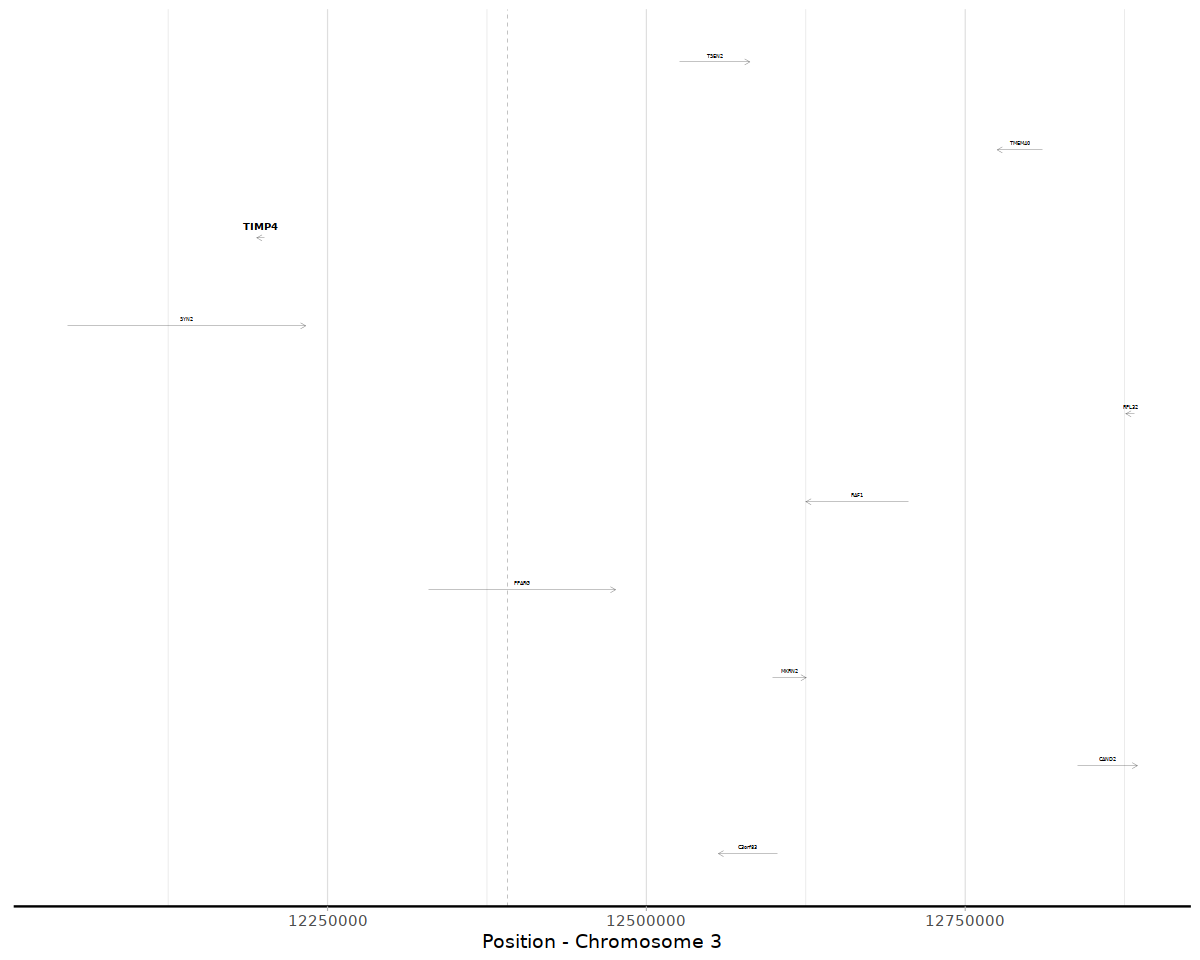

In [49]:
gene_track_plot <- gene_track_dat %>%
    filter(gene_type %in% c("protein_coding", "processed_transcript")) %>%
    ggplot(aes(y = gene_name, x = xstart, xend = xend,
               yend = gene_name, label = gene_name)) +
    geom_vline(xintercept = lead_snp$position,
               linetype = "dashed", alpha = .5, size = .1) +
    geom_segment(arrow = arrow(length = unit(.05, "in")), alpha = .5, size = .1) +
    geom_text(aes(x = (xend + xstart) / 2, y = gene_name,
                  size = ifelse(gene_name == "TIMP4", 2, 1),
                  fontface = ifelse(gene_name == "TIMP4", "bold", "plain")),
              vjust = -1.1) +
    scale_size_identity() +
    labs(x = paste("Position - Chromosome 3"), y = NULL) +
    coord_cartesian(clip = "off") +
    theme_light() +
    theme(axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
          panel.border = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.line.x.bottom = element_line(colour = "black"))
gene_track_plot

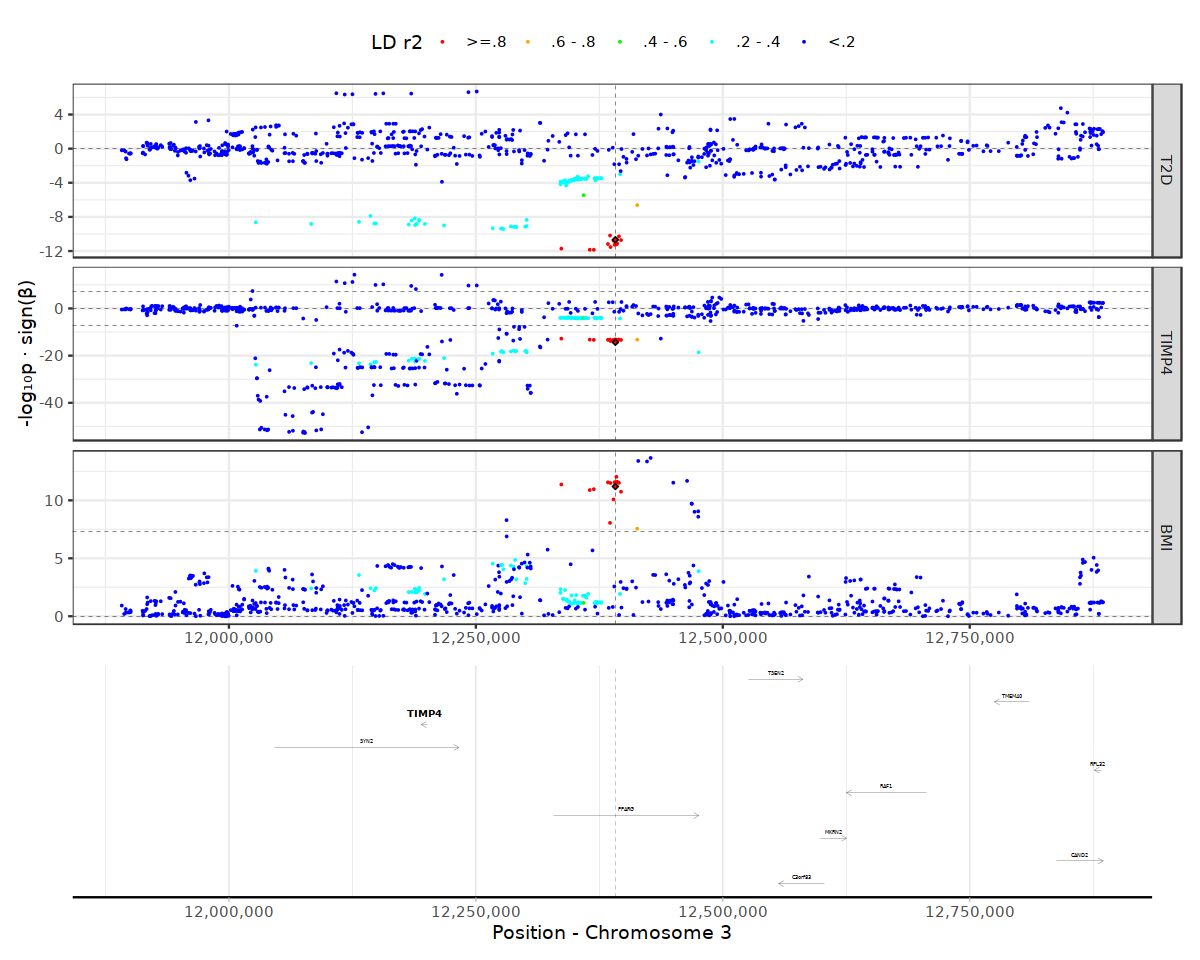

In [63]:
options(repr.plot.height = 8, repr.plot.width = 10)
timp4_plot <- patchwork::wrap_plots(locus_timp4_plot, 
                      gene_track_plot, 
                      ncol = 1, guides = "collect",
                      heights = c(.7, .3)) &
    theme(legend.position = "top") &
    scale_x_continuous(labels = scales::comma, limits = lims_locus)
save(timp4_plot, file = "../plots/timp4_plot.RData")
timp4_plot